In [1]:
from __future__ import absolute_import,print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print(test_labels)


[9 2 1 ... 8 1 5]


In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

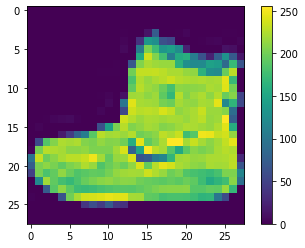

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

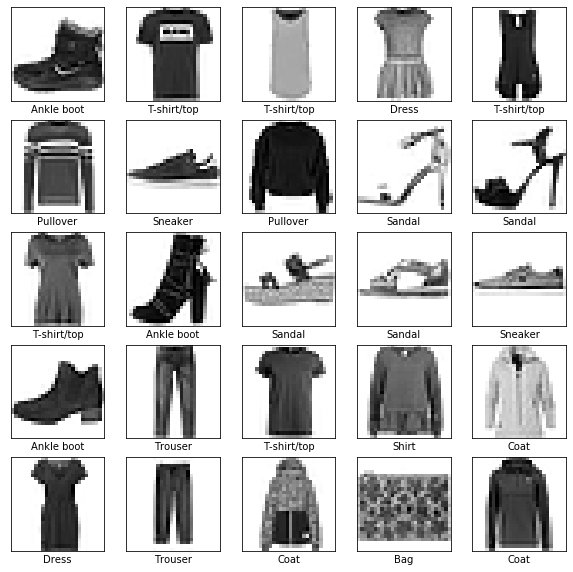

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5026 - accuracy: 0.8231
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3773 - accuracy: 0.8629
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3384 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3153 - accuracy: 0.8834
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2967 - accuracy: 0.8896
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2819 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2704 - accuracy: 0.8988
Epoch 8/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2582 - accuracy: 0.9038
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2483 - accuracy: 0.9079
Epoch 10/10
60

In [16]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\nTest Accuracy:',test_acc)

10000/1 - 1s - loss: 0.2902 - accuracy: 0.8842

Test Accuracy: 0.8842


In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([1.5359998e-07, 7.0107337e-11, 2.1176014e-10, 2.1772063e-12,
       4.9663744e-09, 8.6305587e-04, 1.3237250e-08, 3.5105366e-02,
       2.5087807e-08, 9.6403140e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(predictions_array):
        color='blue'
    else:
        color='red'
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

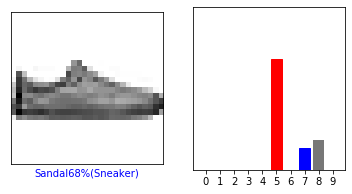

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

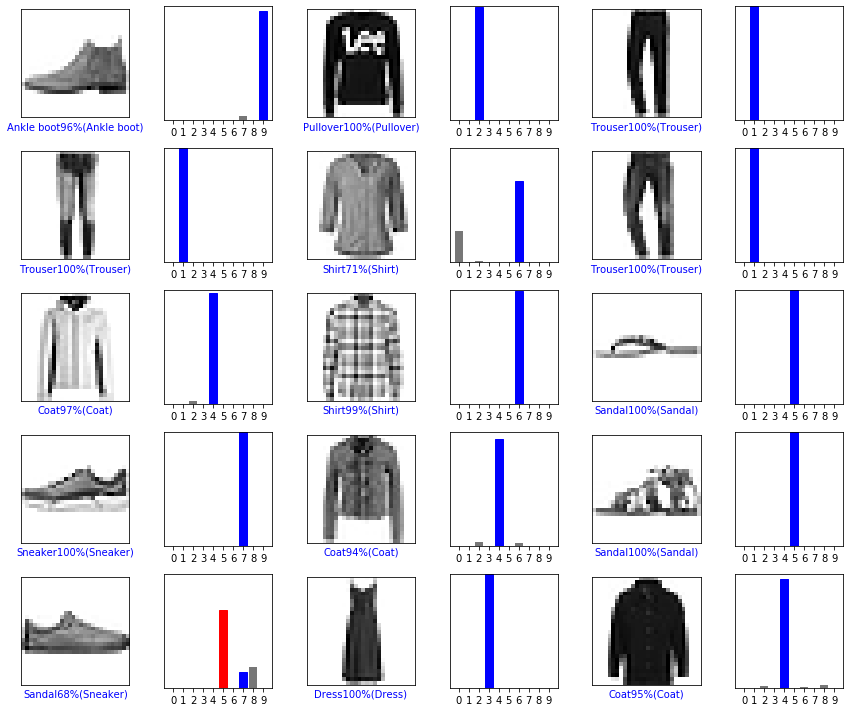

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
img = test_images[8]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2916902e-05 2.1122711e-08 4.0861528e-07 1.0018343e-07 1.1327612e-07
  9.9996889e-01 5.6159664e-08 1.7310642e-05 2.0648041e-07 4.4013837e-09]]


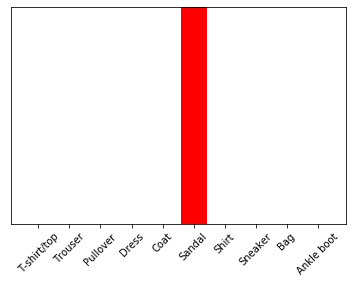

In [27]:
plot_value_array(1,predictions_single[0],test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

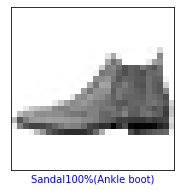

In [28]:
plt.figure(figsize=(6,3))
plot_image(0,predictions_single[0],test_labels,test_images)
plt.show()

In [29]:
np.argmax(predictions_single[0])

5